In [123]:
# https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers
import numpy as np
from sklearn.metrics import accuracy_score
import math as m
from numpy import exp, abs, angle
import matplotlib.pyplot as plt

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return np.array([x, y]).transpose()

In [124]:
# Half circle data 
n = 300
mu1 = 1
sigma1 = 0.2
mu2 = 1
sigma2 = 0.2

r1 = np.random.normal(mu1, sigma1, n)
theta1 = np.random.uniform(0, m.pi, n)

r2 = np.random.normal(mu2, sigma2, n)
theta2 = np.random.uniform(m.pi, 2*m.pi, n)

X1 = pol2cart(r1, theta1)
X2 = pol2cart(r2, theta2)
X2 =np.array([X2[:,0]+1, X2[:,1]+0.5]).transpose()

X_data = np.concatenate((X1, X2), axis=0)
y_data = np.concatenate((np.zeros(n), np.ones(n)), axis=0)

In [125]:
#logistic regression
import sklearn.linear_model as lm

logistic_regression = lm.LogisticRegression(solver = 'liblinear', warm_start = True).fit(X_data, y_data)
lr_params = np.hstack((logistic_regression.intercept_[:,None], logistic_regression.coef_))[0]


y_pred = logistic_regression.predict(X_data)
accuracy = accuracy_score(y_data, y_pred)
error_rate_lr = 1 - accuracy
error_rate_lr

0.11166666666666669

In [126]:
##LDA 

import sklearn.discriminant_analysis as dm

linear_discriminant_analysis = dm.LinearDiscriminantAnalysis(solver = 'lsqr').fit(X_data, y_data) #'lsqr', 'eigen'

y_pred = linear_discriminant_analysis.predict(X_data)

accuracy = accuracy_score(y_data, y_pred)
error_rate_lda = 1 - accuracy
error_rate_lda

0.11833333333333329

In [127]:
import sklearn.discriminant_analysis as dm

quadratic_discriminant_analysis = dm.QuadraticDiscriminantAnalysis().fit(X_data, y_data)

y_pred = quadratic_discriminant_analysis.predict(X_data) 

accuracy = accuracy_score(y_data, y_pred)
error_rate_qda = 1 - accuracy
error_rate_qda

0.11499999999999999

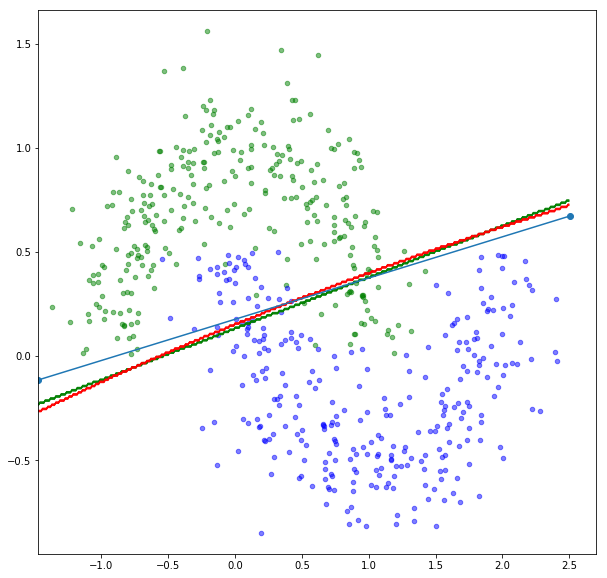

logistic regression error rate: 0.11166666666666669
LDA error rate: 0.11833333333333329
QDA error rate: 0.11499999999999999


In [128]:
h = 0.01
x_min, x_max = X_data[:,0].min() - 10*h, X_data[:,0].max() + 10*h
y_min, y_max = X_data[:,1].min() - 10*h, X_data[:,1].max() + 10*h

xx_lda, yy_lda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_lda = linear_discriminant_analysis.predict(np.c_[xx_lda.ravel(), yy_lda.ravel()])
Z_lda = Z_lda.reshape(xx_lda.shape)

xx_qda, yy_qda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_qda = quadratic_discriminant_analysis.predict(np.c_[xx_qda.ravel(), yy_qda.ravel()])
Z_qda = Z_qda.reshape(xx_qda.shape)

plt.figure(figsize=(10,10))

plt.scatter(X1[:,0], X1[:,1], s=20, color ='g', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], s=20, color = 'b', alpha=0.5)

db_x = [x_min, x_max]
db_y = [-(lr_params[0]+lr_params[1]*db_x[0])/lr_params[2], -(lr_params[0]+lr_params[1]*db_x[1])/lr_params[2]] 
plt.plot(db_x, db_y, marker = 'o')
plt.contour(xx_lda, yy_lda, Z_lda, colors='g', linewidths=0.7)
plt.contour(xx_qda, yy_qda, Z_qda, colors='r',linewidths=0.7)

plt.show()
print('logistic regression error rate: ' + str(error_rate_lr))
print('LDA error rate: ' + str(error_rate_lda))
print('QDA error rate: ' + str(error_rate_qda))

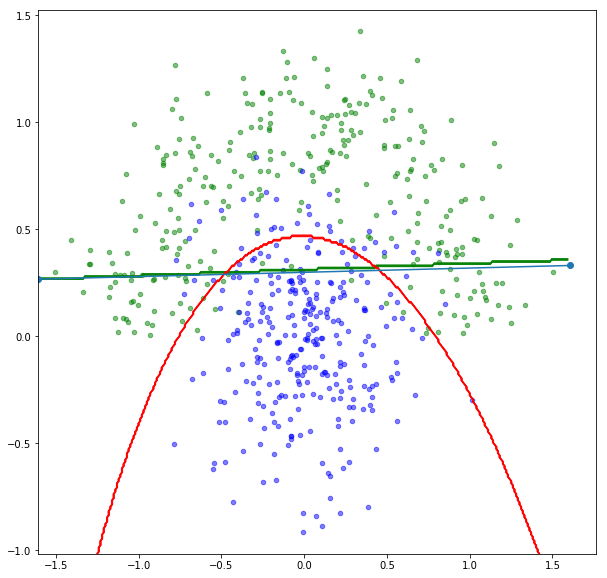

logistic regression error rate: 0.19499999999999995
LDA error rate: 0.19499999999999995
QDA error rate: 0.08333333333333337


In [135]:
# Half circle + normal  
n = 300
mu1 = 1
sigma1 = 0.2
mu2 = [0,0]
sigma2 = [[0.1,0],[0,0.1]]

r1 = np.random.normal(mu1, sigma1, n)
theta1 = np.random.uniform(0, m.pi, n)

X1 = pol2cart(r1, theta1)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

X_data = np.concatenate((X1, X2), axis=0)
y_data = np.concatenate((np.zeros(n), np.ones(n)), axis=0)

#logistic regression
import sklearn.linear_model as lm

logistic_regression = lm.LogisticRegression(solver = 'liblinear', warm_start = True).fit(X_data, y_data)
lr_params = np.hstack((logistic_regression.intercept_[:,None], logistic_regression.coef_))[0]


y_pred = logistic_regression.predict(X_data)
accuracy = accuracy_score(y_data, y_pred)
error_rate_lr = 1 - accuracy

##LDA 
import sklearn.discriminant_analysis as dm

linear_discriminant_analysis = dm.LinearDiscriminantAnalysis(solver = 'lsqr').fit(X_data, y_data) #'lsqr', 'eigen'

y_pred = linear_discriminant_analysis.predict(X_data)

accuracy = accuracy_score(y_data, y_pred)
error_rate_lda = 1 - accuracy

import sklearn.discriminant_analysis as dm

quadratic_discriminant_analysis = dm.QuadraticDiscriminantAnalysis().fit(X_data, y_data)

y_pred = quadratic_discriminant_analysis.predict(X_data) 

accuracy = accuracy_score(y_data, y_pred)
error_rate_qda = 1 - accuracy
error_rate_qda

#plot
h = 0.01
x_min, x_max = X_data[:,0].min() - 10*h, X_data[:,0].max() + 10*h
y_min, y_max = X_data[:,1].min() - 10*h, X_data[:,1].max() + 10*h

xx_lda, yy_lda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_lda = linear_discriminant_analysis.predict(np.c_[xx_lda.ravel(), yy_lda.ravel()])
Z_lda = Z_lda.reshape(xx_lda.shape)

xx_qda, yy_qda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_qda = quadratic_discriminant_analysis.predict(np.c_[xx_qda.ravel(), yy_qda.ravel()])
Z_qda = Z_qda.reshape(xx_qda.shape)

plt.figure(figsize=(10,10))

plt.scatter(X1[:,0], X1[:,1], s=20, color ='g', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], s=20, color = 'b', alpha=0.5)

db_x = [x_min, x_max]
db_y = [-(lr_params[0]+lr_params[1]*db_x[0])/lr_params[2], -(lr_params[0]+lr_params[1]*db_x[1])/lr_params[2]] 
plt.plot(db_x, db_y, marker = 'o')
plt.contour(xx_lda, yy_lda, Z_lda, colors='g', linewidths=0.7)
plt.contour(xx_qda, yy_qda, Z_qda, colors='r',linewidths=0.7)

plt.show()
print('logistic regression error rate: ' + str(error_rate_lr))
print('LDA error rate: ' + str(error_rate_lda))
print('QDA error rate: ' + str(error_rate_qda))

In [148]:
n1 = 5
n2 = 5
shape = 2
scale = 4
mu2 = [0,0]
sigma2 = [[0.1,0],[0,0.1]]

r1 = np.random.normal(mu1, sigma1, n)
theta1 = np.random.uniform(0, m.pi, n)

X1 = np.random.gamma(shape, scale, (n1,2))
X2 = np.random.multivariate_normal(mu2, sigma2, n2)

X_data = np.concatenate((X1, X2), axis=0)
y_data = np.concatenate((np.zeros(n1), np.ones(n2)), axis=0)

print(X_data)
print(y_data)

[[ 7.86231711  2.71839448]
 [ 9.20444368  9.19512157]
 [ 4.92722049 10.23703577]
 [10.30542108  5.00381486]
 [ 4.93633854  3.70605693]
 [ 0.67980435  0.14102738]
 [-0.60643851  0.70931158]
 [-0.347717    0.20388389]
 [ 0.13101291 -0.28382379]
 [ 0.13579083  0.35981232]]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


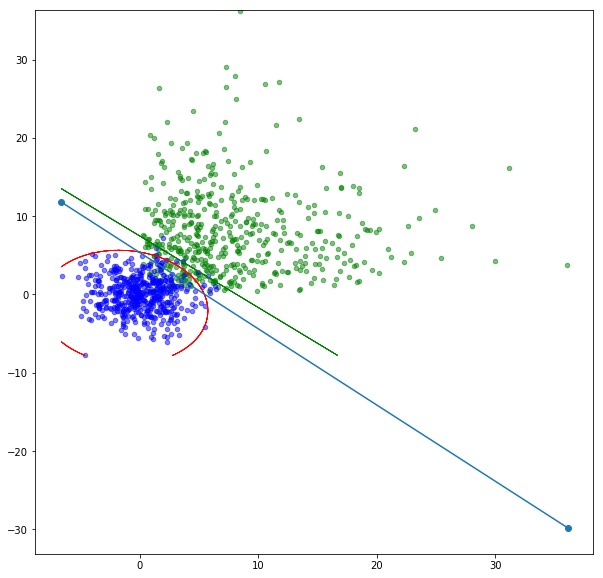

logistic regression error rate: 0.04600000000000004
LDA error rate: 0.07899999999999996
QDA error rate: 0.05900000000000005


In [151]:
# logistic regression: The groups may have quite different n. LDA: The groups should have similar n.
# Logistic regression: Not so sensitive to outliers. LDA: Quite sensitive to outliers.


n1 = 500
n2 = 500
shape = 2
scale = 4
mu2 = [0,0]
sigma2 = [[5,0],[0,5]]

r1 = np.random.normal(mu1, sigma1, n)
theta1 = np.random.uniform(0, m.pi, n)

X1 = np.random.gamma(shape, scale, (n1,2))
X2 = np.random.multivariate_normal(mu2, sigma2, n2)

X_data = np.concatenate((X1, X2), axis=0)
y_data = np.concatenate((np.zeros(n1), np.ones(n2)), axis=0)

#logistic regression
import sklearn.linear_model as lm

logistic_regression = lm.LogisticRegression(solver = 'liblinear', warm_start = True).fit(X_data, y_data)
lr_params = np.hstack((logistic_regression.intercept_[:,None], logistic_regression.coef_))[0]


y_pred = logistic_regression.predict(X_data)
accuracy = accuracy_score(y_data, y_pred)
error_rate_lr = 1 - accuracy

##LDA 
import sklearn.discriminant_analysis as dm

linear_discriminant_analysis = dm.LinearDiscriminantAnalysis(solver = 'lsqr').fit(X_data, y_data) #'lsqr', 'eigen'

y_pred = linear_discriminant_analysis.predict(X_data)

accuracy = accuracy_score(y_data, y_pred)
error_rate_lda = 1 - accuracy

import sklearn.discriminant_analysis as dm

quadratic_discriminant_analysis = dm.QuadraticDiscriminantAnalysis().fit(X_data, y_data)

y_pred = quadratic_discriminant_analysis.predict(X_data) 

accuracy = accuracy_score(y_data, y_pred)
error_rate_qda = 1 - accuracy
error_rate_qda

#plot
h = 0.01
x_min, x_max = X_data[:,0].min() - 10*h, X_data[:,0].max() + 10*h
y_min, y_max = X_data[:,1].min() - 10*h, X_data[:,1].max() + 10*h

xx_lda, yy_lda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_lda = linear_discriminant_analysis.predict(np.c_[xx_lda.ravel(), yy_lda.ravel()])
Z_lda = Z_lda.reshape(xx_lda.shape)

xx_qda, yy_qda = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_qda = quadratic_discriminant_analysis.predict(np.c_[xx_qda.ravel(), yy_qda.ravel()])
Z_qda = Z_qda.reshape(xx_qda.shape)

plt.figure(figsize=(10,10))

plt.scatter(X1[:,0], X1[:,1], s=20, color ='g', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], s=20, color = 'b', alpha=0.5)

db_x = [x_min, x_max]
db_y = [-(lr_params[0]+lr_params[1]*db_x[0])/lr_params[2], -(lr_params[0]+lr_params[1]*db_x[1])/lr_params[2]] 
plt.plot(db_x, db_y, marker = 'o')
plt.contour(xx_lda, yy_lda, Z_lda, colors='g', linewidths=0.7)
plt.contour(xx_qda, yy_qda, Z_qda, colors='r',linewidths=0.7)

plt.show()
print('logistic regression error rate: ' + str(error_rate_lr))
print('LDA error rate: ' + str(error_rate_lda))
print('QDA error rate: ' + str(error_rate_qda))